# Plotting only significant differences

In many studies it is useful to only show differences that are statistically significant using some test and significance level. We have created a function that uses a t-test (from scipy) to mask differences that are not significant. This function can be used for any pair of arrays. The hyphotesis that will be tested is whether their mean values are the same or not. Though not required, both arrays should have the same sample number, which means in our kind of studies that their time dimension should have the same size. Let's import obrero:

In [1]:
# small hack to be able to import module without install
import os
import sys
sys.path.append(os.getcwd() + '/../')

import obrero
import obrero.plot as oplot

Now we are going to use data from two experiments to plot only the significant differences between them:

In [2]:
# file names
f1 = 'data/ctl.nc'
f2 = 'data/amp50.nc'

# read as data array
da = obrero.read_nc(f1, 'pr')
db = obrero.read_nc(f2, 'pr')

# convert units
da.convert_units('mm day-1')
db.convert_units('mm day-1')

obrero has the function `get_significant_diff()`, part of the `obrero.analysis` module. It is simply a wrapper around the great `stats.ttest_ind()` from SciPy.  There are some important keywords you should use. The first is `alpha` which is the significance level and by default is 0.05. Then we have `eqvar` which is a true or false value that will determine whether variances are different or not. In case they are not different the test is called student t-test, otherwise it is called a Welch's t-test. Then you can choose to get as output an array only of the significant differences (default) or also the mean arrays using the boolean keyword `means_too`. Let's get the significant difference only and plot it:

In [5]:
d = obrero.get_significant_diff(db, da, eqvar=False)

Now we plot it. **The order matters because the difference will always be the first array minus the second one**.

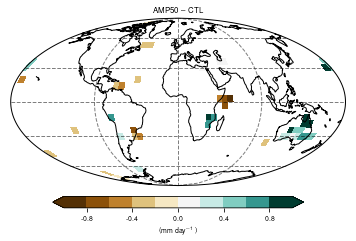

In [4]:
%matplotlib inline
spec = dict(cm = 'BrBG', method = 'mesh', extend = 'both', minv = -1.0,
             maxv = 1.0, nlevels = 11, title = r"AMP50 -- CTL", cbstring = r'(mm day$^{-1}$)')
ax = oplot.plot_global_contour(d, **spec)

We can see that there are very few significant differences. If we chose a different alpha:

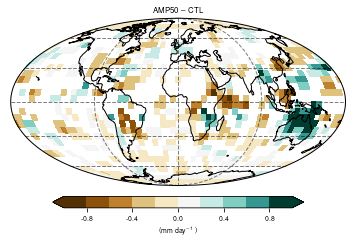

In [6]:
d = obrero.get_significant_diff(db, da, eqvar=False, alpha=0.5)
ax2 = oplot.plot_global_contour(d, **spec)